In [ ]:
import sys
'geopandas' in sys.modules
!pip install geopandas

In [4]:
import sys
import geopandas as gpd
import pandas as pd
italy = gpd.read_file('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.shp')
new_regions = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.csv')
covid = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/Covid.csv')

In [ ]:
italy.plot(figsize=(10, 10))
italy.head()

In [6]:
#Whit this line we are substituting the first column from the file italy (=the .shp file) with the first column of the modified
#CSV file (=new_regions)

italy['NOME_REG'] = new_regions['NOME_REG']

In [7]:
merge = italy.merge(covid, on='NOME_REG', how='right')
merge.head()

,COD_REG,NOME_REG,SHAPE_Leng,SHAPE_Area,geometry,Confirmed,Death
0,3,Lombardia,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126...",72889.0,13325.0
1,1,Piemonte,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5...",24832.0,2823.0
2,8,Emilia-Romagna,1.164723e+06,2.245147e+10,"MULTIPOLYGON (((760714.748 4937319.399, 760723...",24450.0,3386.0
3,5,Veneto,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5...",17471.0,1315.0
4,9,Toscana,1.316658e+06,2.298443e+10,"MULTIPOLYGON (((593650.250 4867988.000, 593553...",9147.0,778.0


In [ ]:
merge['Ratio'] = merge['Death'] / merge['Confirmed']
merge.head()

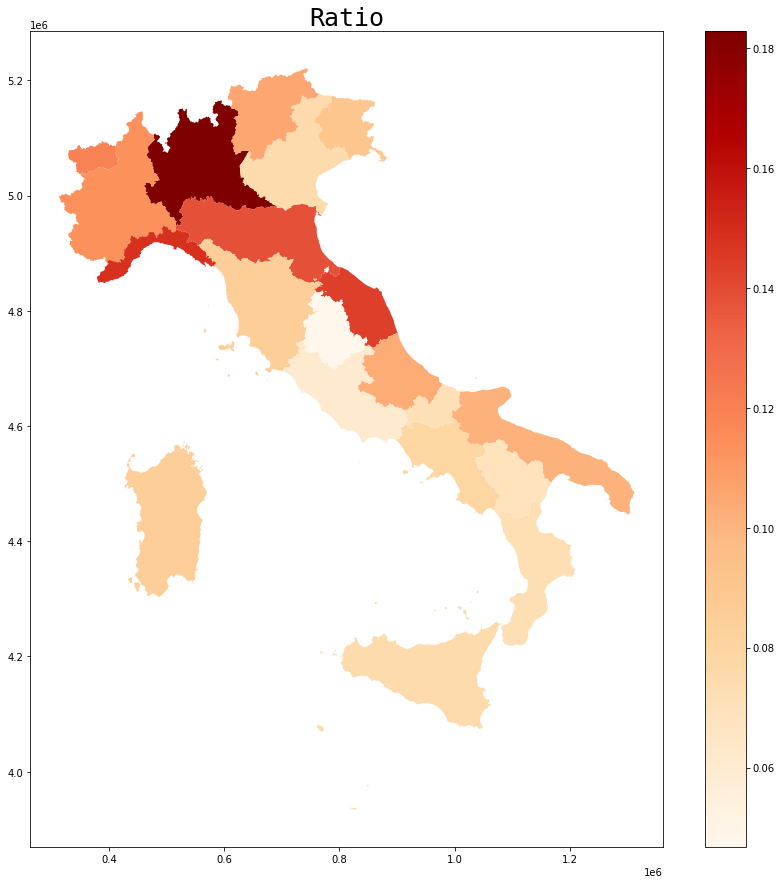

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(15, 15))
col = 'Ratio'
ax.set_title(col, fontdict={'fontsize':'25', 'fontweight':'5'}, color='Black', fontfamily='monospace')
merge.plot(ax=ax, column=col, cmap='OrRd', label='ciao', legend=True, categorical=False)